# Trabajo Practico N° 2 

* Alumnos: Lo Menzo Alejo y Mateo Gravi Fiorino
* Fecha: 29/05/2024
* Profesores: Dr. Ing. Flavio E. Spetale y Ing. Facundo Vasquez
* Materia: Mineria de Datos

despues puntos a mejorar para este trabajo:
* Dividirnos bien que va a hablar cada uno asi no nos pisamos
* Ser mas prolijos sobre las explcaciones de los graficos y codigo
* No psarnos con el tiempo de exposicion

## Ejercicio 1 

Descargar el conjunto de datos, 1000_Companies.csv1, para realizar el trabajo práctico. 
Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de 
datos, etc.) y elegir un método de estandarización.

### Importe de librerías necesarias

In [180]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

### Carga de dataset

In [181]:
df = pd.read_csv("1000_Companies.csv")
df.head(5)

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   RyD_Spend       1000 non-null   float64 
 1   Administration  1000 non-null   float64 
 2   MarketingSpend  1000 non-null   float64 
 3   State           1000 non-null   category
 4   Profit          1000 non-null   float64 
dtypes: category(1), float64(4)
memory usage: 32.5 KB


In [182]:
df['State'] = df['State'].astype('category')

### Graficos

**Distribucion de la variable objetivo 'Profit'**, 
Podemos identificar que es una distribución normal, 
sesgada a la derecha. También comprendemos mejor como se comporta esta variable.

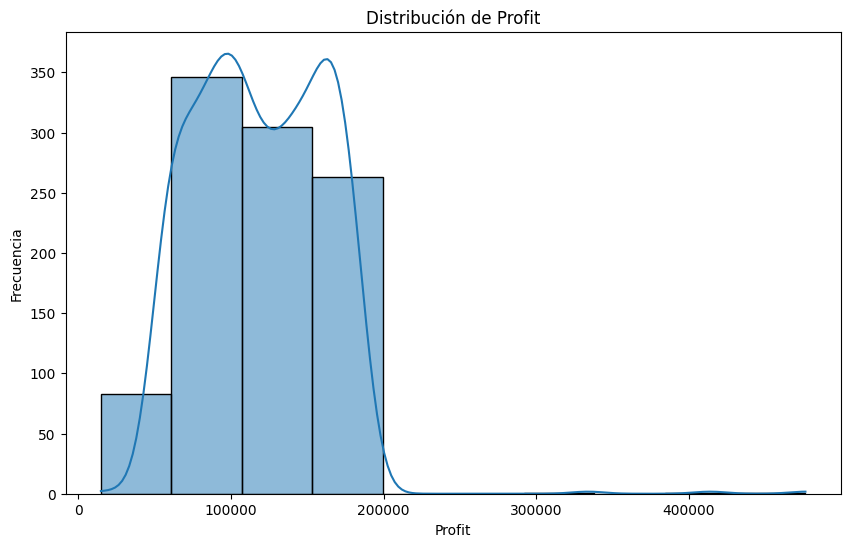

In [38]:
# Histograma de Profit
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=10, kde=True)
plt.title('Distribución de Profit')
plt.xlabel('Profit')
plt.ylabel('Frecuencia')
plt.show()


**Scatter**


Mostrar la relacion entre dos variables numéricas, en este caso RyD_Spend y Profit
Podemos observar una relacion bastante lineal entre ambas

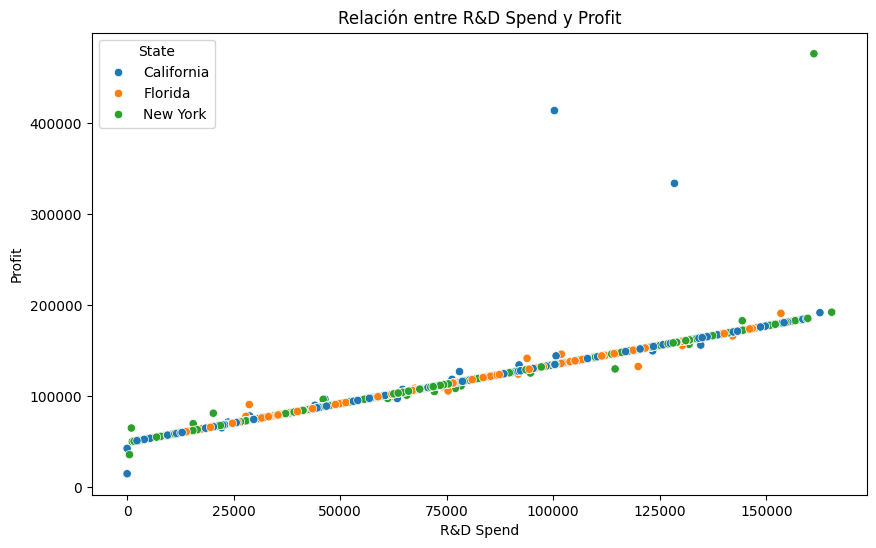

In [39]:
# Scatter plot entre R&D Spend y Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RyD_Spend', y='Profit', data=df, hue='State')
plt.title('Relación entre R&D Spend y Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()


**Boxplot**

No tiene casi valores atípicos con respecto al estado. Entendemos medianas y cuartiles. ¿Vemos una influencia de la ubicacion geografica con la ganancia?

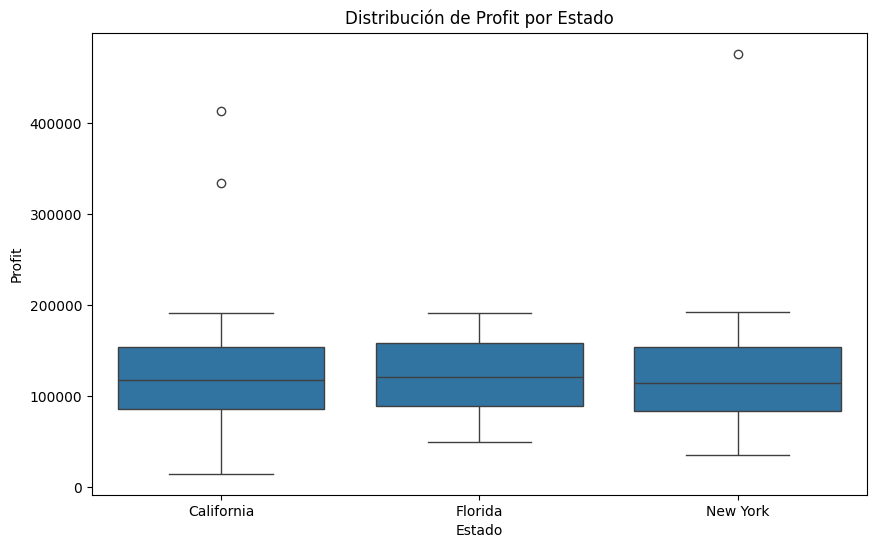

In [40]:
# Boxplot de Profit por Estado
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Profit', data=df)
plt.title('Distribución de Profit por Estado')
plt.xlabel('Estado')
plt.ylabel('Profit')
plt.show()

**Matriz de Correlacion**

Correlación entre variables, donde los colores representan la fuerza de la correlación.
Podemos ver que las correlaciones son muy fuertes.

In [41]:
columns = ['RyD_Spend','Administration','MarketingSpend','Profit']

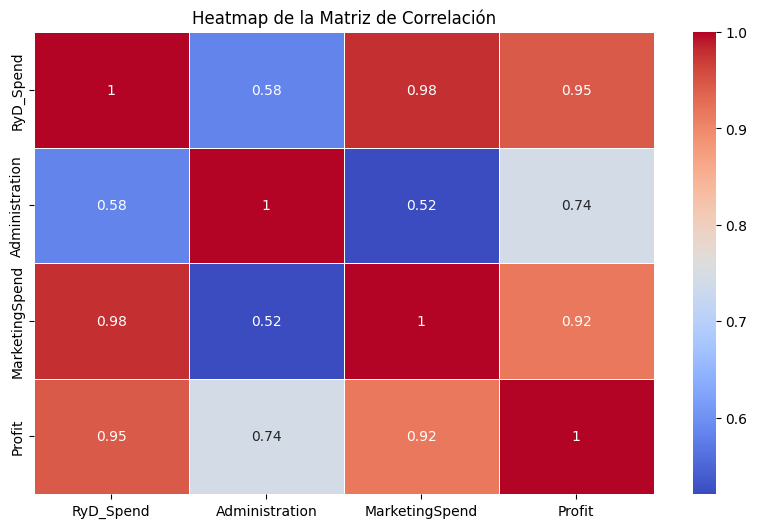

In [42]:
df_corr = df[columns]
# Heatmap de la matriz de correlación
plt.figure(figsize=(10, 6))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

## Aplicando One-Hot Encoding

In [142]:
unique_states = df['State'].unique()
(unique_states)

['New York', 'California', 'Florida']
Categories (3, object): ['California', 'Florida', 'New York']

In [183]:
df = pd.get_dummies(df, columns=['State'])

In [184]:
df.rename(columns={'State_New York': 'State_New_York'}, inplace=True)

In [185]:
df['State_California'] = df['State_California'].astype(int)
df['State_Florida'] = df['State_Florida'].astype(int)
df['State_New_York'] = df['State_New_York'].astype(int)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RyD_Spend         1000 non-null   float64
 1   Administration    1000 non-null   float64
 2   MarketingSpend    1000 non-null   float64
 3   Profit            1000 non-null   float64
 4   State_California  1000 non-null   int32  
 5   State_Florida     1000 non-null   int32  
 6   State_New_York    1000 non-null   int32  
dtypes: float64(4), int32(3)
memory usage: 43.1 KB


In [186]:
df

,RyD_Spend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.800,471784.1000,192261.83000,0,0,1
1,162597.70,151377.590,443898.5300,191792.06000,1,0,0
2,153441.51,101145.550,407934.5400,191050.39000,0,1,0
3,144372.41,118671.850,383199.6200,182901.99000,0,0,1
4,142107.34,91391.770,366168.4200,166187.94000,0,1,0
...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,1,0,0
996,134970.00,130390.080,329204.0228,164336.60550,1,0,0
997,100275.47,241926.310,227142.8200,413956.48000,1,0,0
998,128456.23,321652.140,281692.3200,333962.19000,1,0,0


### Estandarización de los datos

Importamos librerías necesarias para standarizar

In [147]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


Estandarizamos usand StandarScaler, ajustamos el escalador a los datos y los transformamos.

In [153]:
"""
# Separar las características y la variable objetivo
features = df[['RyD_Spend', 'Administration', 'MarketingSpend']]
target = df['Profit']

# Aplicar StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Crear un DataFrame con las características estandarizadas
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Agregar la variable objetivo y la columna 'State' al DataFrame estandarizado
df_scaled['Profit'] = target.values
df_scaled['State_California'] = df['State_California'].values
df_scaled['State_Florida'] = df['State_Florida'].values
df_scaled['State_New_York'] = df['State_New_York'].values
"""

## Ejercicio 2

Realizar la estimación del atributo Profit utilizando árboles de decisión (Regresión) 
analizando los parámetros máximo profundidad, número mínimo de observaciones, 
número mínimo de observaciones por separación y criterio de separación. Graficar el 
árbol obtenido en el proceso de entrenamiento y mostrar los resultados sobre dos 
conjuntos de test (Error Absoluto Medio, Error Cuadrático Medio y Raíz del Error 
Cuadrático Medio). 

In [187]:
# Definimos las características y la variable objetivo 
X = df.dropop('Profit', axis)1)y
= dfed['Profit']

# Dividimos el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.23, random_state=42)

SyntaxError: invalid syntax (2411290439.py, line 2)

In [169]:
feature_list = list(X_train.columns)
feature_list

['RyD_Spend',
 'Administration',
 'MarketingSpend',
 'State_California',
 'State_Florida',
 'State_New_York']

In [ ]:
clf = tree.DecisionTreeRegressor(max_depth=6,min_samples_leaf=1, min_samples_split=2, random_state=13 )

Train MAE: 6381.366997669327
Train MSE: 60657424.05585438
Train RMSE: 7788.287620257381
Test MAE: 6592.782212973188
Test MSE: 147789949.5500089
Test RMSE: 12156.888974980766


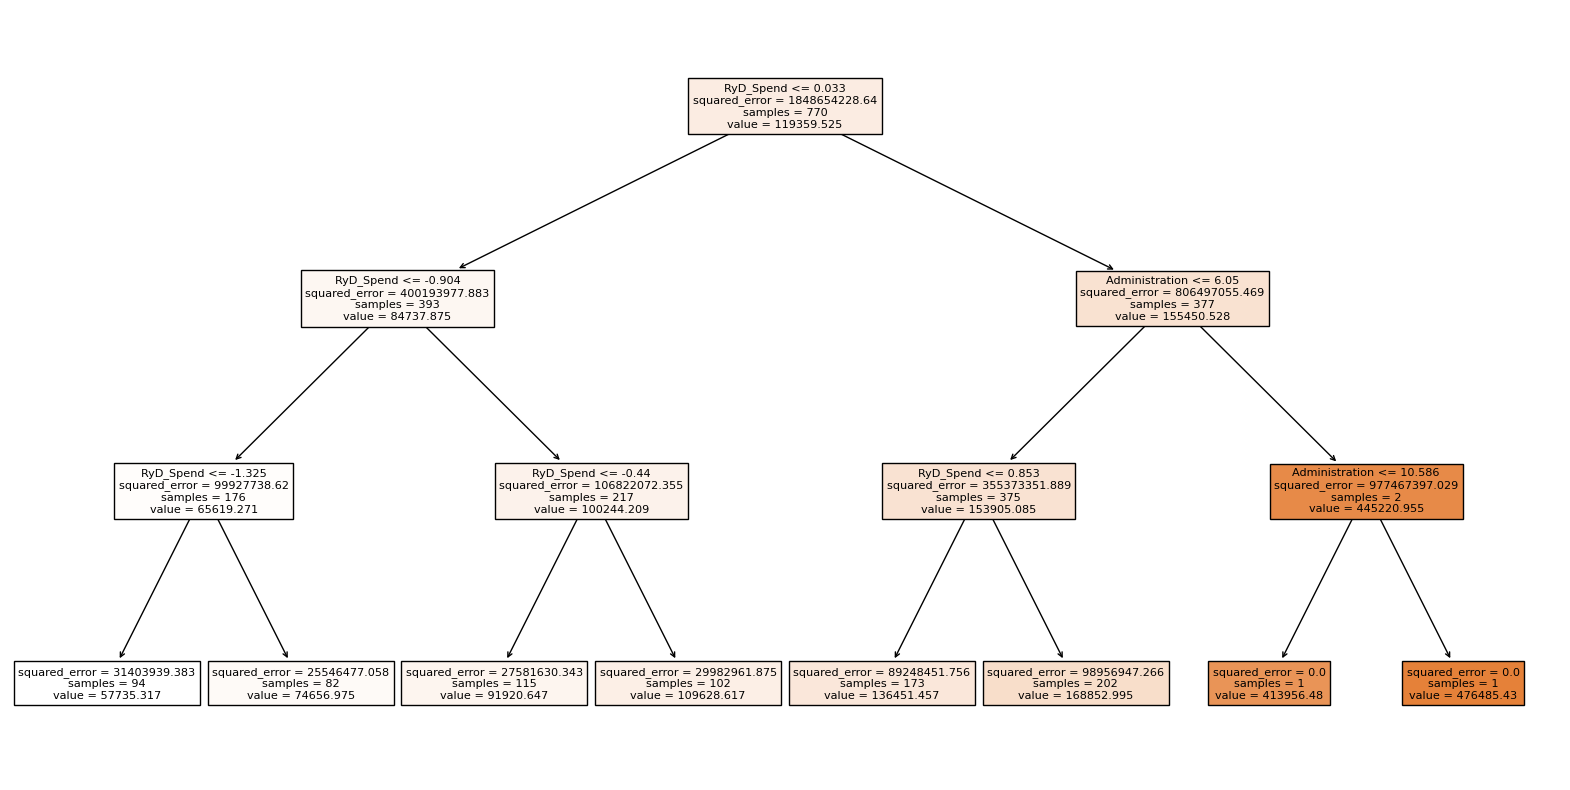

In [170]:
# Entrenar el modelo de árbol de decisión y podemos ajustar los parámetros max_depth, min_samples_split, min_samples_leaf, y criterion, segun nos parezca 
regressor = DecisionTreeRegressor(max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion='squared_error')
regressor.fit(X_train, y_train)

# Evaluamos el modelo
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Calculamos las métricas
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"Train MAE: {mae_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Test MAE: {mae_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")

# Graficamos el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(regressor, feature_names=X.columns, filled=True)
plt.show()


## Ejercicio 3

Descargar el conjunto de datos, PokemonDB.csv2, para realizar el trabajo práctico. 
Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de 
datos, etc.)

### Importamos las librerias necesarias 

In [50]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

### Carga del dataset

In [79]:
df_pkm = pd.read_csv("PokemonDB.csv")
df_pkm

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1185,Chi-Yu,Dark,55,80,80,135,120,100
1186,Roaring Moon,Dragon,105,139,71,55,101,119
1187,Iron Valiant,Fairy,74,130,90,120,60,116
1188,Koraidon,Fighting,100,135,115,85,100,135


### EDA

In [80]:
df_pkm.dtypes # Tipos de los datos del df

Name       object
Type       object
HP          int64
Attack      int64
Defense     int64
Sp. Atk     int64
Sp. Def     int64
Speed       int64
dtype: object

In [81]:
df_pkm.describe() # Medidas básicas del dataset

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,70.852941,80.957983,74.586555,72.756303,72.050420,69.695798
std,26.886443,32.119650,30.718212,32.658636,27.637522,30.204376
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,51.250000,56.000000,51.000000,50.000000,50.000000,45.000000
50%,70.000000,80.000000,70.000000,65.000000,70.000000,67.000000
75%,85.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [82]:
df_pkm.info() # Comprobamos los nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1190 non-null   object
 1   Type     1190 non-null   object
 2   HP       1190 non-null   int64 
 3   Attack   1190 non-null   int64 
 4   Defense  1190 non-null   int64 
 5   Sp. Atk  1190 non-null   int64 
 6   Sp. Def  1190 non-null   int64 
 7   Speed    1190 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 74.5+ KB


In [83]:
df_pkm.columns # Columnas del dataset

Index(['Name', 'Type', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed'],
      dtype='object')

### Graficos

**Histogramas de las diferentes variables**

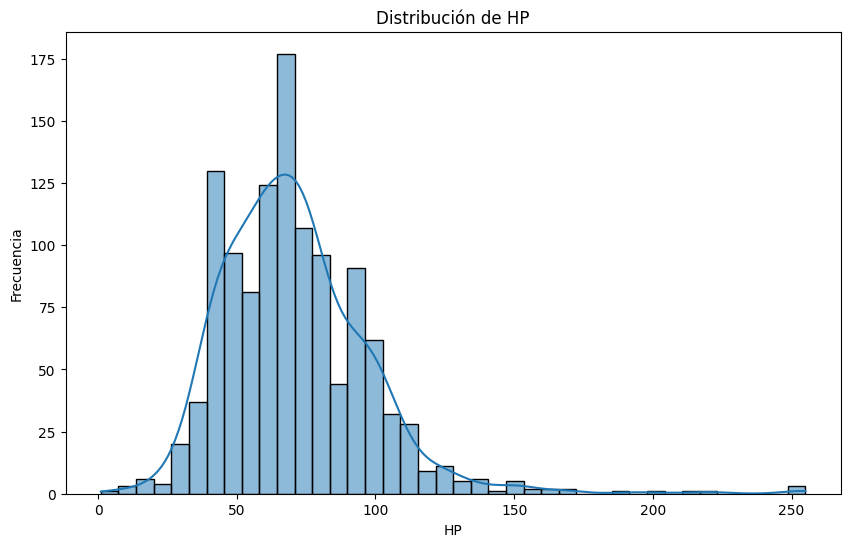

In [84]:
# Histograma de HP
plt.figure(figsize=(10, 6))
sns.histplot(df_pkm['HP'], kde=True)
plt.title('Distribución de HP')
plt.xlabel('HP')
plt.ylabel('Frecuencia')
plt.show()


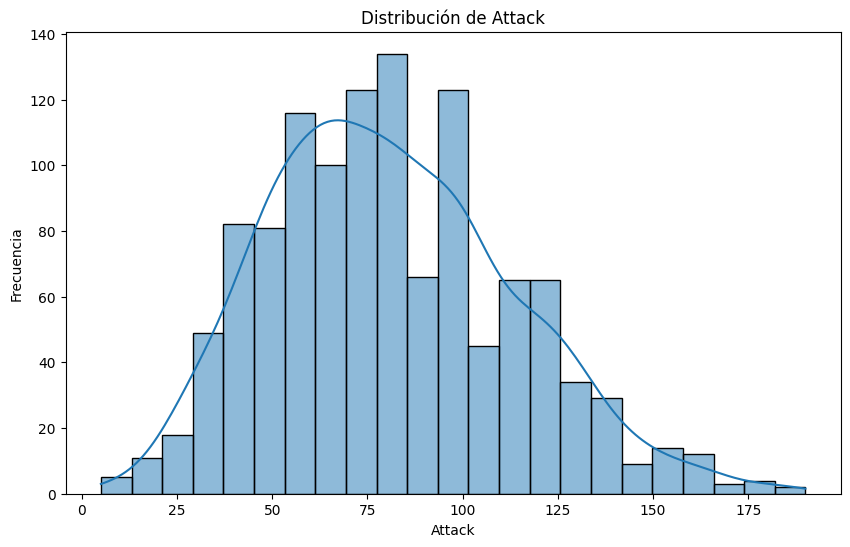

In [85]:
# Histograma de Attack
plt.figure(figsize=(10, 6))
sns.histplot(df_pkm['Attack'], kde=True)
plt.title('Distribución de Attack')
plt.xlabel('Attack')
plt.ylabel('Frecuencia')
plt.show()


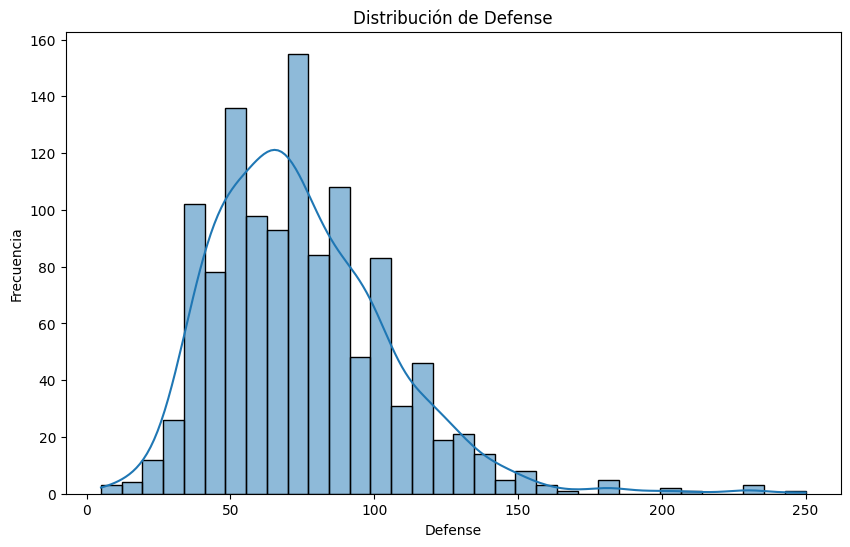

In [88]:
# Histograma de Defense
plt.figure(figsize=(10, 6))
sns.histplot(df_pkm['Defense'], kde=True)
plt.title('Distribución de Defense')
plt.xlabel('Defense')
plt.ylabel('Frecuencia')
plt.show()


**Boxplots de estadisticas de batalla**

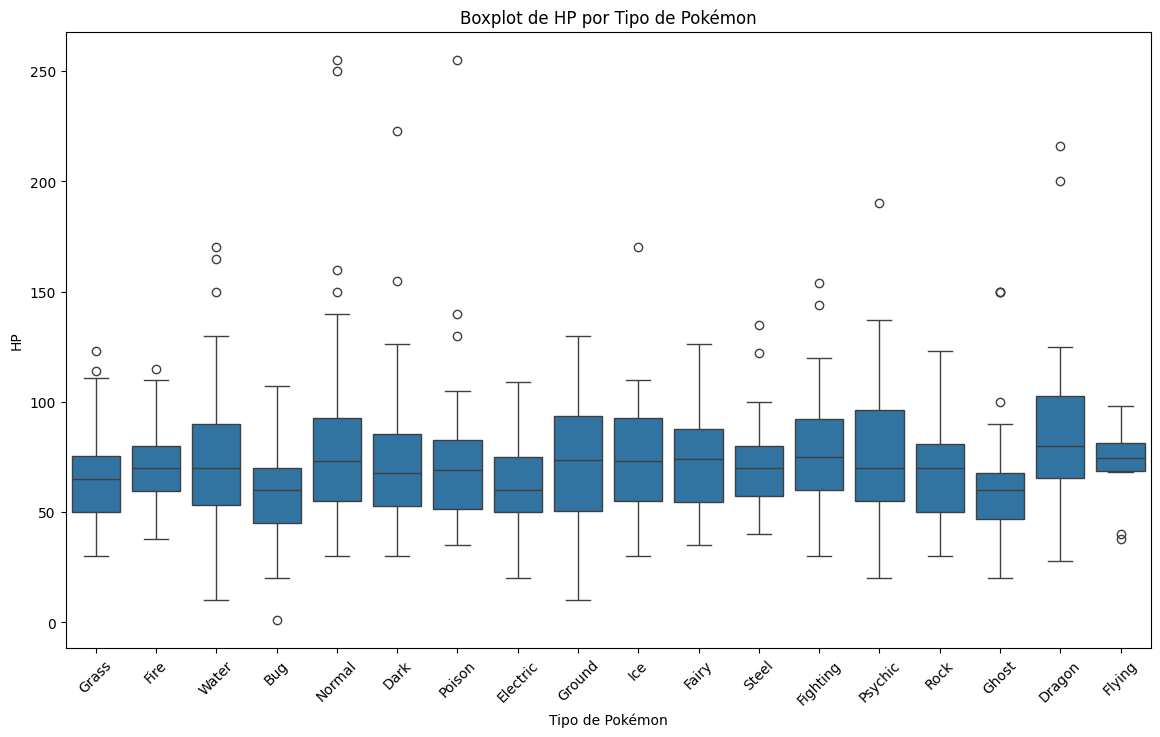

In [100]:
# Boxplot de HP por Tipo de Pokémon
plt.figure(figsize=(14, 8))
sns.boxplot(x='Type', y='HP', data=df_pkm)
plt.title('Boxplot de HP por Tipo de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('HP')
plt.xticks(rotation=45)
plt.show()


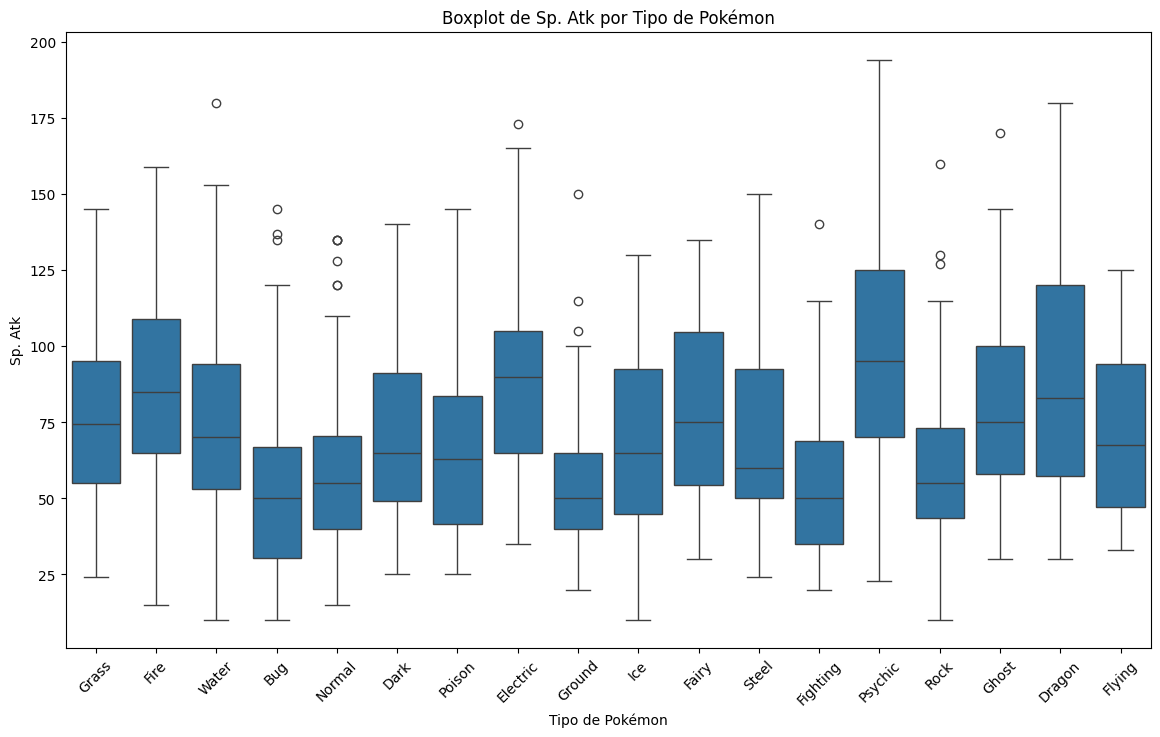

In [104]:
# Boxplot de Sp. Atk por Tipo de Pokémon
plt.figure(figsize=(14, 8))
sns.boxplot(x='Type', y='Sp. Atk', data=df_pkm)
plt.title('Boxplot de Sp. Atk por Tipo de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('Sp. Atk')
plt.xticks(rotation=45)
plt.show()

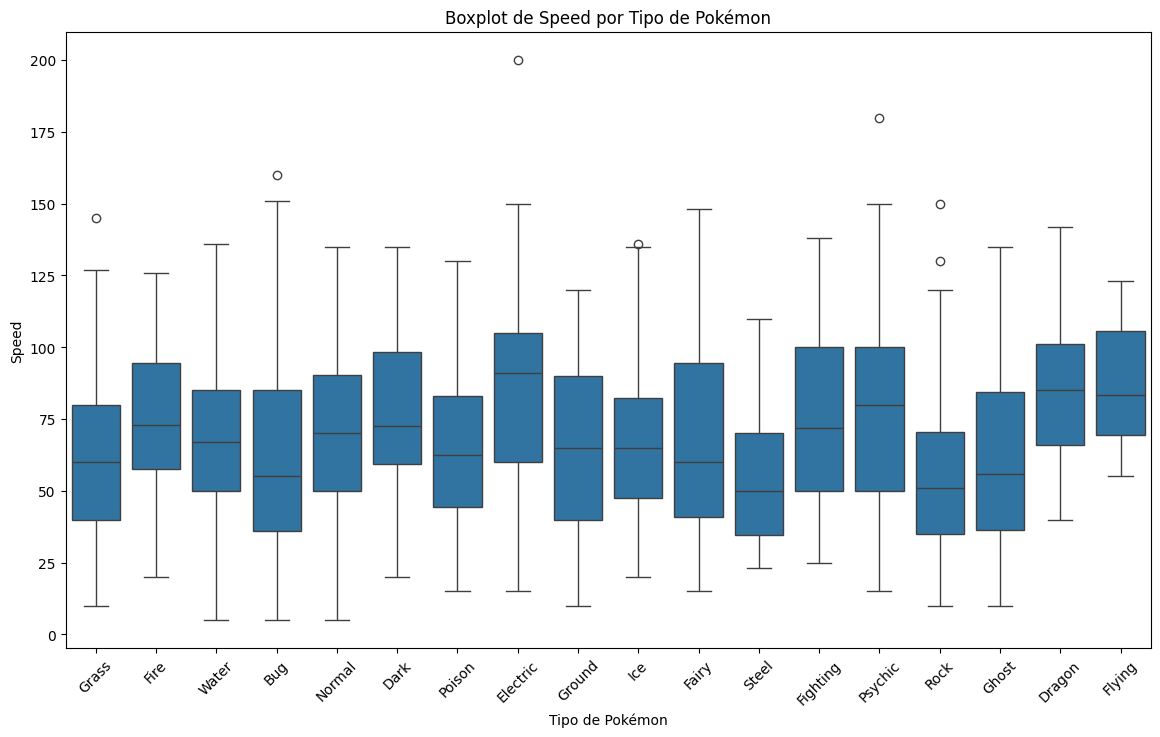

In [106]:
# Boxplot de Speed por Tipo de Pokémon
plt.figure(figsize=(14, 8))
sns.boxplot(x='Type', y='Speed', data=df_pkm)
plt.title('Boxplot de Speed por Tipo de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('Speed')
plt.xticks(rotation=45)
plt.show()


**Scatterplot**

Podemos obervar como se relaciona el ataque con la defensa segun el tipo del pokemon

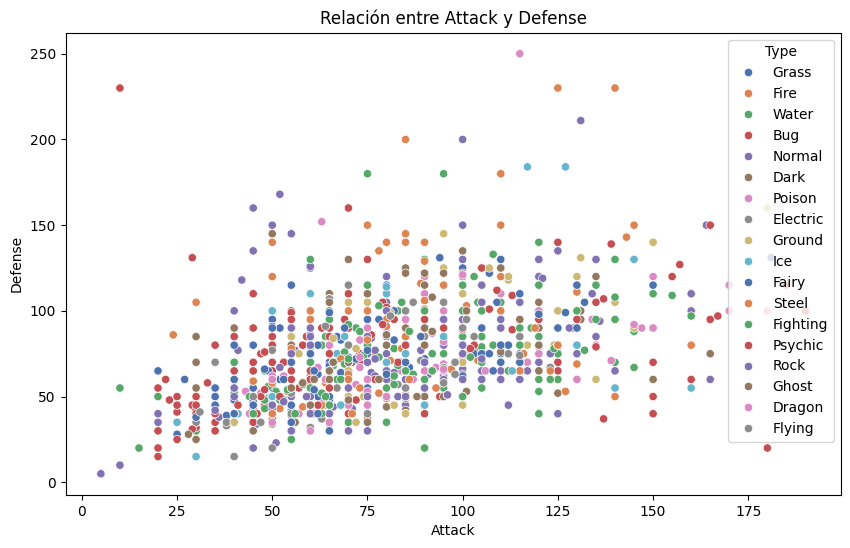

In [108]:
# Scatter plot entre Attack y Defense
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attack', y='Defense', data=df_pkm, hue='Type', palette='deep')
plt.title('Relación entre Attack y Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend(title='Type')
plt.show()

**Matriz de correlacion**

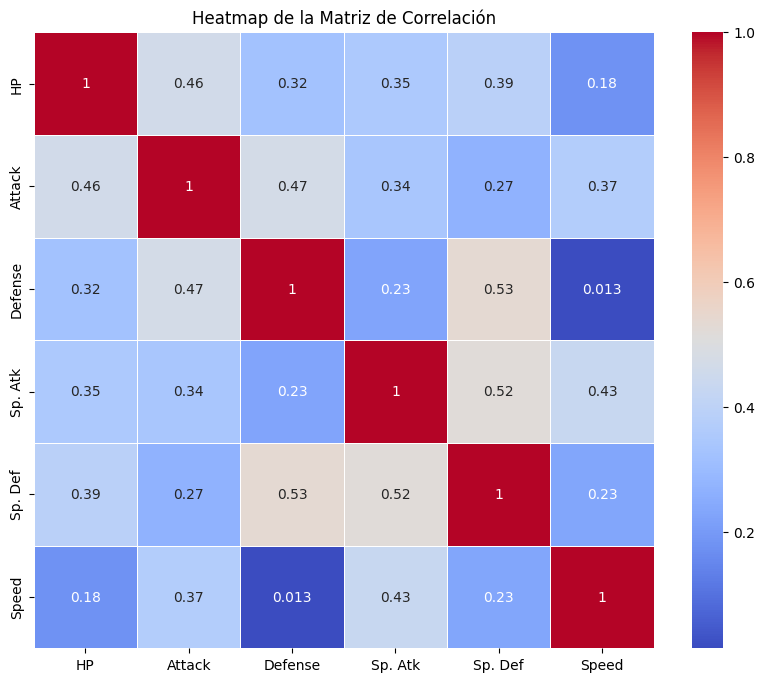

In [113]:
# Heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df_pkm[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()


## Ejercicio 4

Realizar la estimación del atributo Type utilizando árboles de decisión (Clasificación) 
analizando los parámetros máximo profundidad, número mínimo de observaciones, 
número mínimo de observaciones por separación y criterio de separación. 

Graficar el árbol obtenido en el proceso de entrenamiento y mostrar los resultados sobre dos 
conjuntos de test (Precisión, Exhaustividad y Exactitud).  

### Librerias

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

### Split

In [177]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_pkm = df_pkm[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y_pkm = df_pkm['Type']
X_train_pkm, X_test_pkm, y_train_pkm, y_test_pkm = train_test_split(X_pkm, y_pkm, test_size=0.2, random_state=42)

### Parámetros de arboles de decision

¿Cómo construimos el  árbol y como lo regularizamos para evitar el sobre ajuste? 

'max_depth', es la profundidad maxima del arbol, elegimos una profundidad de 3, 5 y 7.

'min_samples_split' refiere al numero minimo de muestras requeridas para dividir un nodo interno. Si el numero de muestras en menor el nodo no se dividira y se convierte en hoja.

'min_samples_leaf' denota el numero de muestras necesarias para ser una hoja, un valor más alto puede suavizar el modelo

In [178]:
# Definir diferentes configuraciones de árboles de decisión
parameters = [
    {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'},
    {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'entropy'},
    {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 3, 'criterion': 'gini'}
]

### Arbol

Modelo 1 - Parámetros: {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}


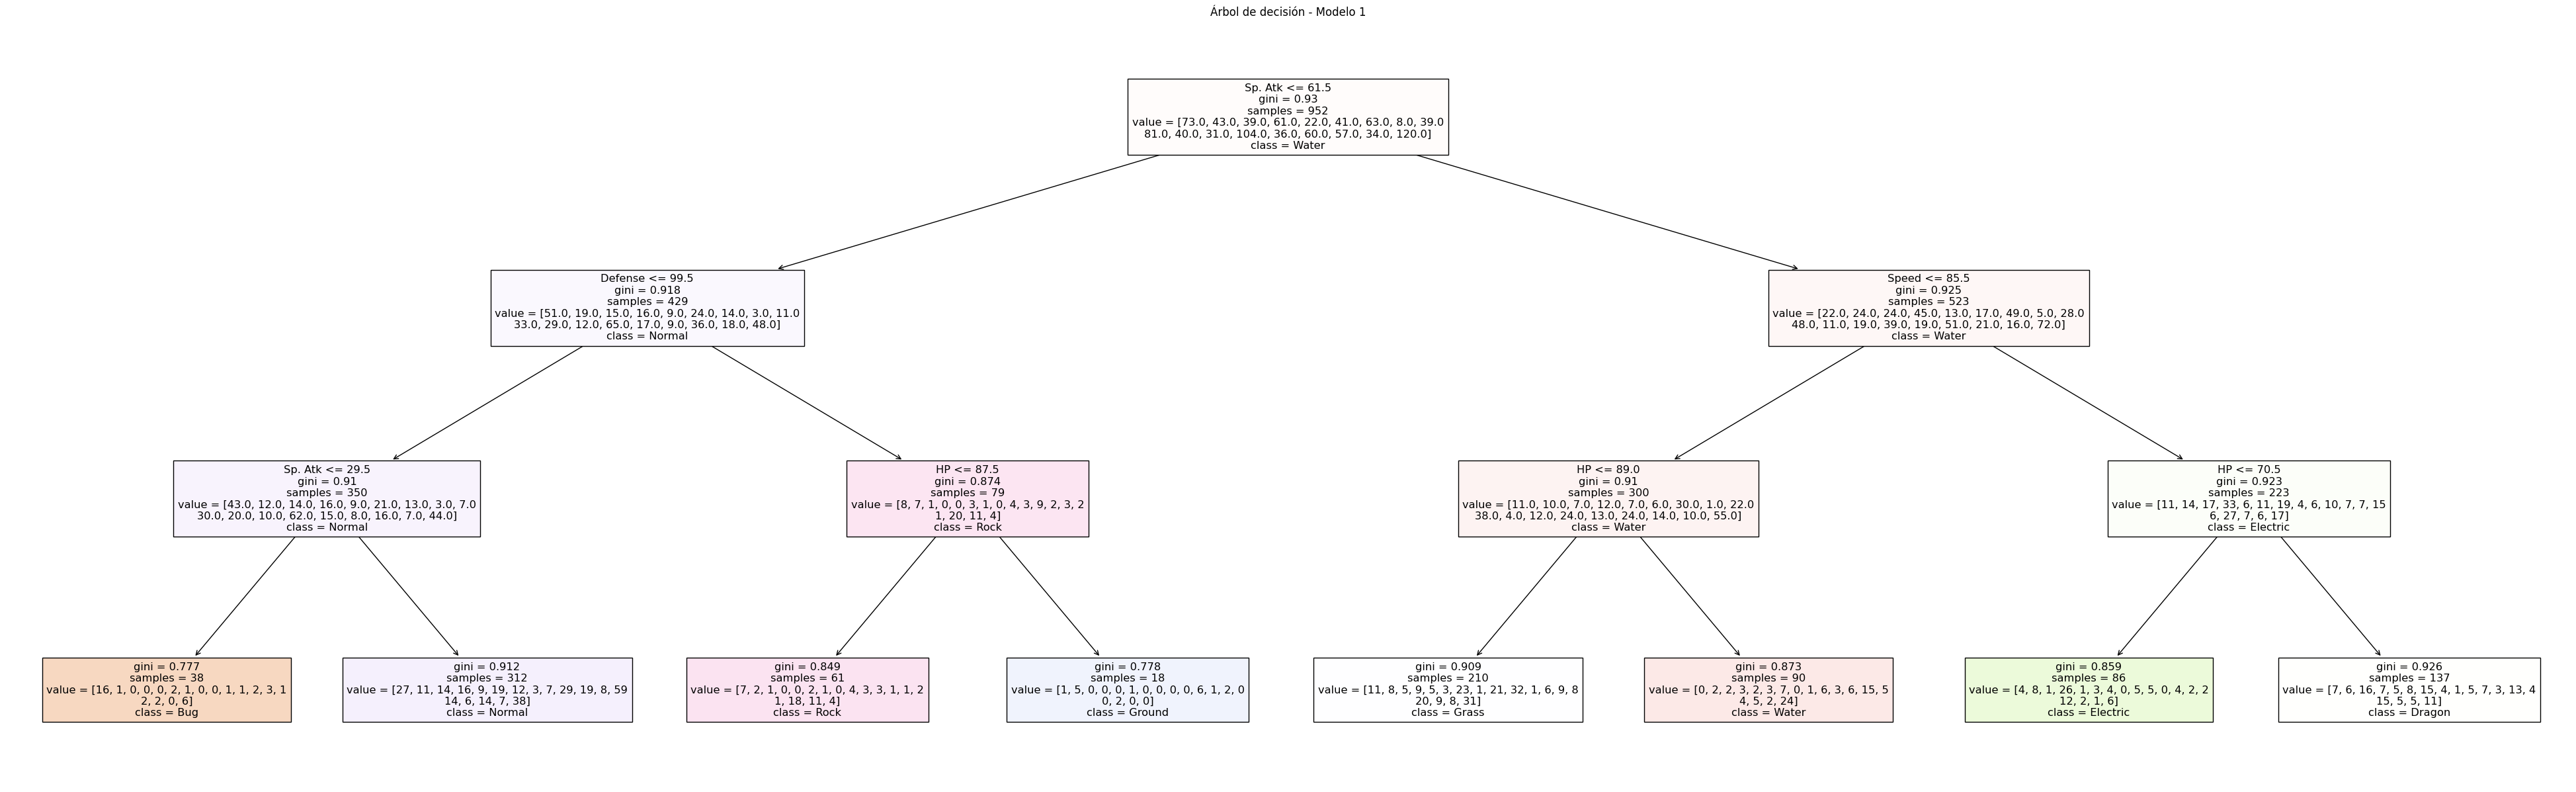

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.1639
Precision: 0.1039
Recall: 0.1639


Modelo 2 - Parámetros: {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'entropy'}


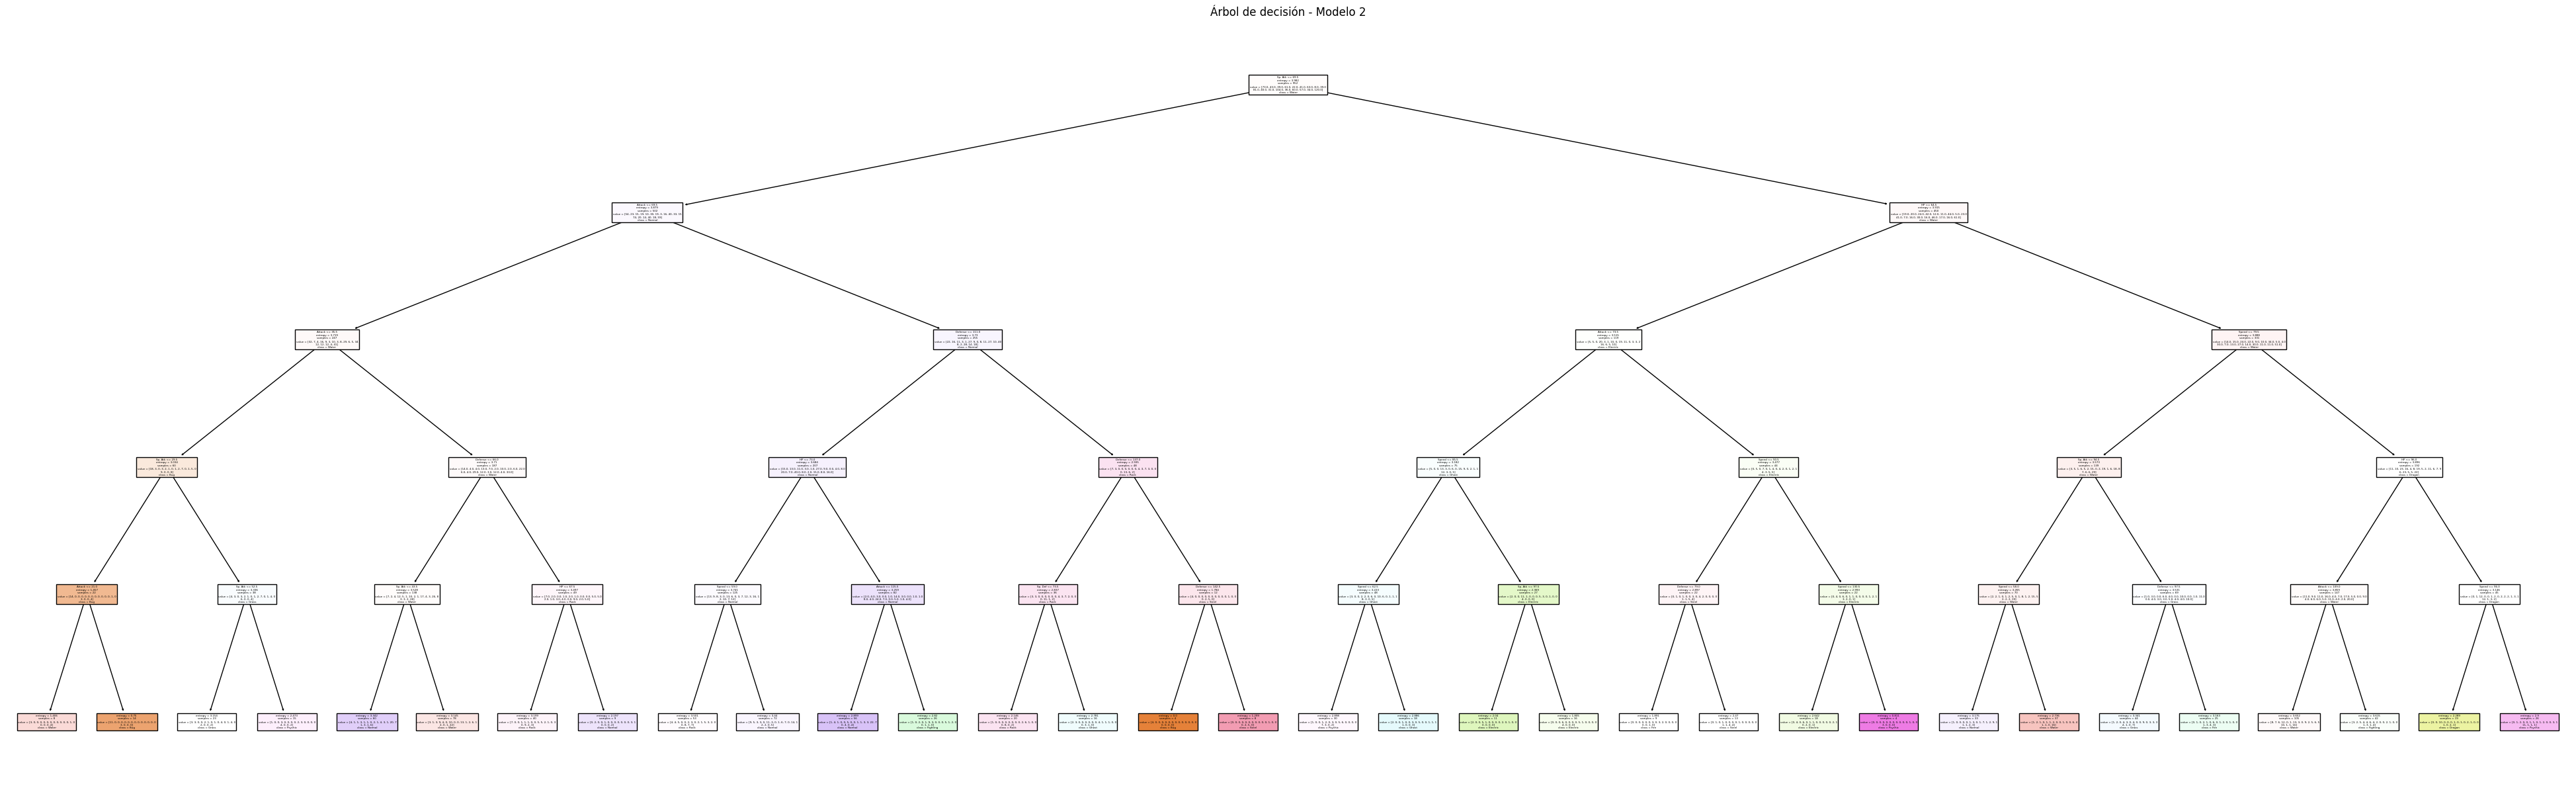

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.1765
Precision: 0.1320
Recall: 0.1765


Modelo 3 - Parámetros: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 3, 'criterion': 'gini'}


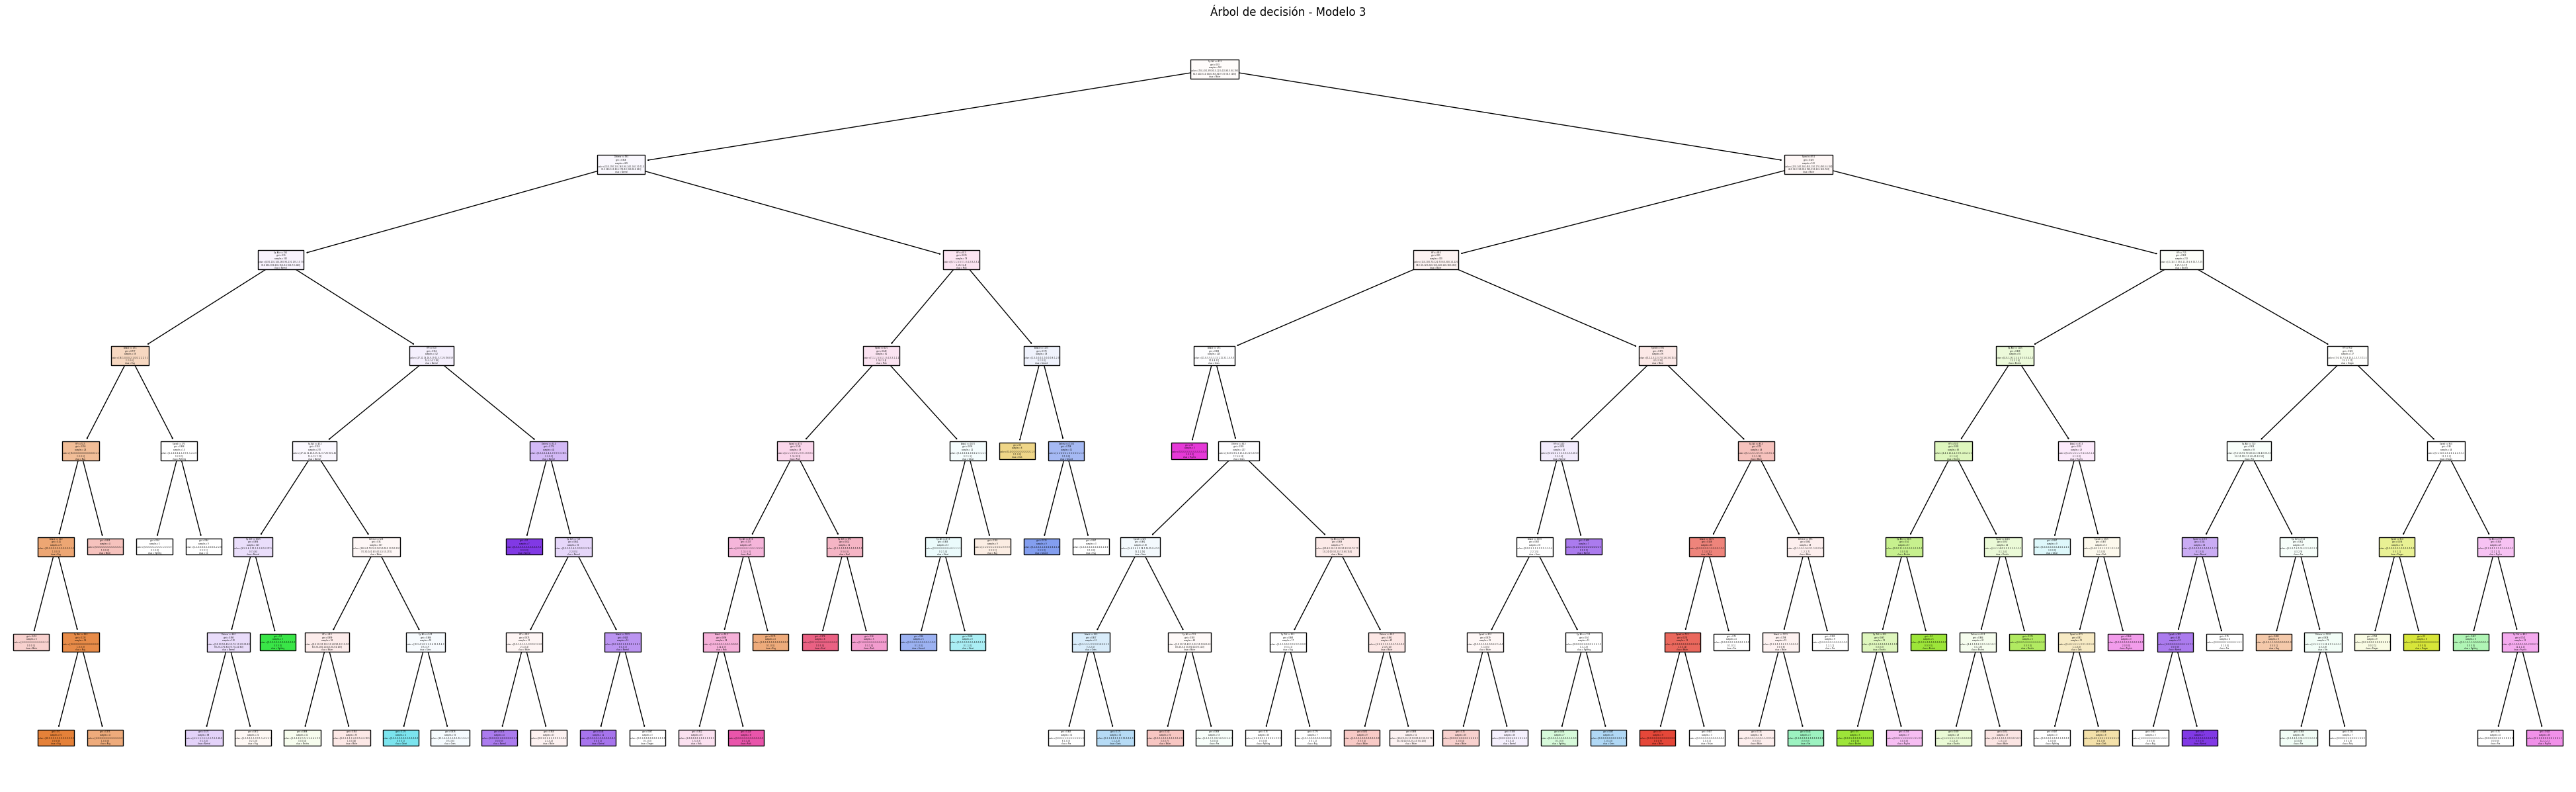

Accuracy: 0.1555
Precision: 0.1470
Recall: 0.1555




c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [179]:
# Entrenar y evaluar diferentes modelos de árbol de decisión
for i, params in enumerate(parameters):
    print(f"Modelo {i+1} - Parámetros: {params}")
    clf = DecisionTreeClassifier(**params)
    clf.fit(X_train_pkm, y_train_pkm)
    
    # Graficar el árbol
    plt.figure(figsize=(50, 15))
    plot_tree(clf, feature_names=X_pkm.columns, class_names=sorted(y_pkm.unique()), filled=True)
    plt.title(f"Árbol de decisión - Modelo {i+1}")
    plt.show()
    
    # Evaluar el modelo en el conjunto de prueba
    y_pred_pkm = clf.predict(X_test_pkm)
    accuracy = accuracy_score(y_test_pkm, y_pred_pkm)
    precision = precision_score(y_test_pkm, y_pred_pkm, average='weighted')
    recall = recall_score(y_test_pkm, y_pred_pkm, average='weighted')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\n")

## Ejercicio 5

Realizar la estimación del atributo Type utilizando Bayes Ingenuo. Aquí deberá 
considerar un criterio de división de los atributos para discretizarlos. Mostrar los 
resultados sobre dos conjuntos de test (Precisión, Exhaustividad y Exactitud).

## Ejercicio 6

Realizar la estimación del atributo Type utilizando k-NN analizando los parámetros 
cantidad de vecinos, métrica y valor de p. Mostrar los resultados sobre un conjunto de 
test (Precisión, Exhaustividad y Exactitud)